In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
import time
import tracemalloc

In [2]:
datasdp = pd.read_csv('D:\AAAAKK SKRIPSWEETT\Bismillah Code Skripsi V2\Dataset\dataset_sdp_undersampling.csv', delimiter=";")

X = datasdp.drop(columns=['bugs'])
y = datasdp['bugs']

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_base, X_train_meta, y_train_base, y_train_meta = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

counts_training = y_train.value_counts()
print("data distribiution data training: ", counts_training)
counts_testing = y_train_base.value_counts()
print("data distribiution data testing: ", counts_testing)

data distribiution data training:  bugs
0    593
1    458
Name: count, dtype: int64
data distribiution data testing:  bugs
0    286
1    239
Name: count, dtype: int64


Validation roc auc score:  0.8560903149138444
validation accuracy :  0.8593155893536122
validation recall :  0.8363636363636363
validation f1-score :  0.832579185520362
validation precision :  0.8288288288288288


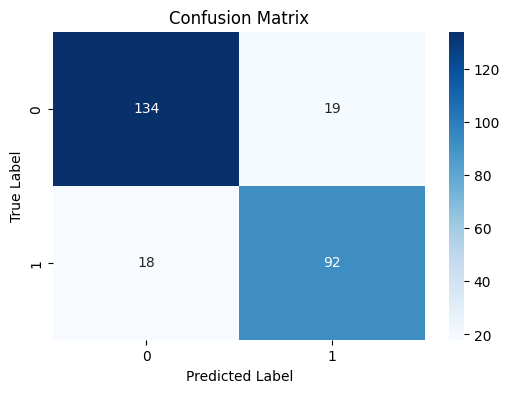

Waktu pelatihan: 12.4961 detik
Penggunaan memori: 28.8709 MB (saat ini), 28.9313 MB (puncak)


In [3]:
#random forest
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, f1_score, precision_score

# Mulai tracking waktu dan memori
start_time = time.time()
tracemalloc.start()


# (n_estimators=50, max_depth=4, min_samples_leaf=5, criterion='gini')

#initial: 
# Validation roc auc score:  0.828817587641117
# validation accuracy :  0.8365019011406845
# validation recall :  0.7818181818181819
# validation f1-score :  0.8
# validation precision :  0.819047619047619

#{'n_estimators': 50, 'max_depth': 8, 'min_samples_leaf': 1, 'criterion': 'gini'}. Best is trial 0 with value: 0.8433361216785504.
rf_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=8,
    min_samples_leaf=1,
    criterion='gini'
)

rf_model.fit(X_train_base, y_train_base)
predictions_rf = rf_model.predict(X_holdout)

#metrics calculation
roc_auc = roc_auc_score(y_holdout, predictions_rf)
print('Validation roc auc score: ', roc_auc)

accuracy = accuracy_score(y_holdout, predictions_rf)
print('validation accuracy : ', accuracy)

recall = recall_score(y_holdout, predictions_rf)
print('validation recall : ', recall)

f1score = f1_score(y_holdout, predictions_rf)
print('validation f1-score : ', f1score)

precision  = precision_score(y_holdout, predictions_rf)
print('validation precision : ', precision)

#Confussion Metrics of Random Forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_holdout, predictions_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Akhiri tracking memori dan waktu
current, peak = tracemalloc.get_traced_memory()
end_time = time.time()

# Output
print(f"Waktu pelatihan: {end_time - start_time:.4f} detik")
print(f"Penggunaan memori: {current / 10**6:.4f} MB (saat ini), {peak / 10**6:.4f} MB (puncak)")

# Stop tracing
tracemalloc.stop()

Validation roc auc score:  0.8417409387997623
validation accuracy :  0.844106463878327
validation recall :  0.8272727272727273
validation f1-score :  0.8161434977578476
validation precision :  0.8053097345132744


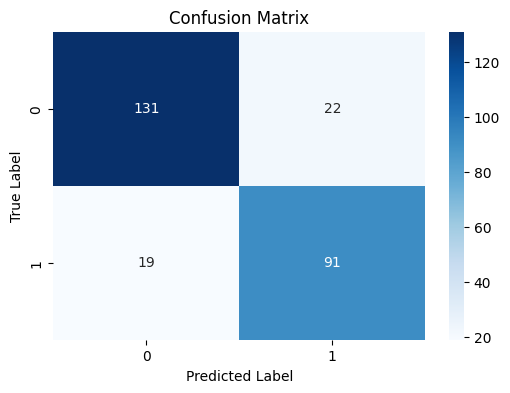

Waktu pelatihan: 6.9279 detik
Penggunaan memori: 1.1446 MB (saat ini), 1.2166 MB (puncak)


In [5]:
#2. extra trees
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, f1_score, precision_score

# Mulai tracking waktu dan memori
start_time = time.time()
tracemalloc.start()

#{'n_estimators': 50, 'max_depth': 8, 'min_samples_leaf': 1, 'criterion': 'gini'}. Best is trial 0 with value: 0.8433361216785504.
et_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=8,
    min_samples_leaf=1,
    criterion='gini'
)

et_model.fit(X_train_base, y_train_base)
predictions_rf = et_model.predict(X_holdout)

#metrics calculation
roc_auc = roc_auc_score(y_holdout, predictions_rf)
print('Validation roc auc score: ', roc_auc)

accuracy = accuracy_score(y_holdout, predictions_rf)
print('validation accuracy : ', accuracy)

recall = recall_score(y_holdout, predictions_rf)
print('validation recall : ', recall)

f1score = f1_score(y_holdout, predictions_rf)
print('validation f1-score : ', f1score)

precision  = precision_score(y_holdout, predictions_rf)
print('validation precision : ', precision)

#Confussion Metrics of Random Forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_holdout, predictions_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Akhiri tracking memori dan waktu
current, peak = tracemalloc.get_traced_memory()
end_time = time.time()

# Output
print(f"Waktu pelatihan: {end_time - start_time:.4f} detik")
print(f"Penggunaan memori: {current / 10**6:.4f} MB (saat ini), {peak / 10**6:.4f} MB (puncak)")

# Stop tracing
tracemalloc.stop()

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Validation roc auc score:  0.8273915626856805
validation accuracy :  0.8288973384030418
validation recall :  0.8181818181818182
validation f1-score :  0.8
validation precision :  0.782608695652174


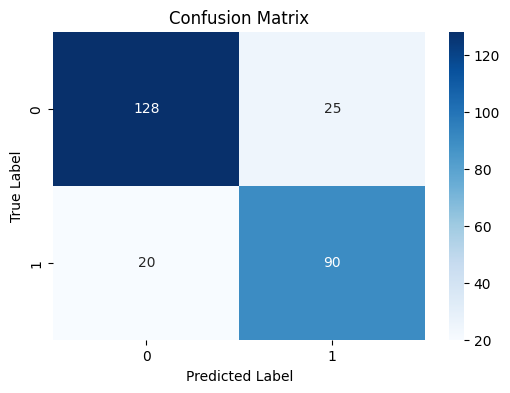

Waktu pelatihan: 1.1273 detik
Penggunaan memori: 1.2767 MB (saat ini), 1.3485 MB (puncak)


In [6]:
#3. Adapative Boosting (AdaaBoost) using smote technique

from sklearn.ensemble  import  AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report

# Mulai tracking waktu dan memori
start_time = time.time()
tracemalloc.start()

adaboost_model = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=1
)

adaboost_model.fit(X_train_base, y_train_base)
predictions_rf = adaboost_model.predict(X_holdout)

#metrics calculation
roc_auc = roc_auc_score(y_holdout, predictions_rf)
print('Validation roc auc score: ', roc_auc)

accuracy = accuracy_score(y_holdout, predictions_rf)
print('validation accuracy : ', accuracy)

recall = recall_score(y_holdout, predictions_rf)
print('validation recall : ', recall)

f1score = f1_score(y_holdout, predictions_rf)
print('validation f1-score : ', f1score)

precision  = precision_score(y_holdout, predictions_rf)
print('validation precision : ', precision)

#Confussion Metrics of Random Forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_holdout, predictions_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Akhiri tracking memori dan waktu
current, peak = tracemalloc.get_traced_memory()
end_time = time.time()

# Output
print(f"Waktu pelatihan: {end_time - start_time:.4f} detik")
print(f"Penggunaan memori: {current / 10**6:.4f} MB (saat ini), {peak / 10**6:.4f} MB (puncak)")

# Stop tracing
tracemalloc.stop()

Validation roc auc score:  0.8469994058229353
validation accuracy :  0.8517110266159695
validation recall :  0.8181818181818182
validation f1-score :  0.821917808219178
validation precision :  0.8256880733944955


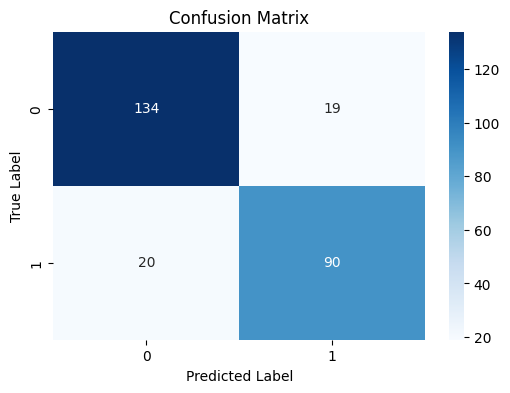

Waktu pelatihan: 16.3843 detik
Penggunaan memori: 1.3372 MB (saat ini), 1.4089 MB (puncak)


In [7]:
#4. Gradient Boosting 

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, f1_score, precision_score, classification_report

# Mulai tracking waktu dan memori
start_time = time.time()
tracemalloc.start()

# {'n_estimators': 500, 'learning_rate': 0.1, 'min_samples_leaf': 1, 'max_depth': 7}

gb_model = GradientBoostingClassifier(
    n_estimators=500, 
    learning_rate=0.1,
    min_samples_leaf=1,
    max_depth=7,
    loss='exponential'
)
   

gb_model.fit(X_train_base, y_train_base)
predictions_rf = gb_model.predict(X_holdout)

#metrics calculation
roc_auc = roc_auc_score(y_holdout, predictions_rf)
print('Validation roc auc score: ', roc_auc)

accuracy = accuracy_score(y_holdout, predictions_rf)
print('validation accuracy : ', accuracy)

recall = recall_score(y_holdout, predictions_rf)
print('validation recall : ', recall)

f1score = f1_score(y_holdout, predictions_rf)
print('validation f1-score : ', f1score)

precision  = precision_score(y_holdout, predictions_rf)
print('validation precision : ', precision)

#Confussion Metrics of Random Forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_holdout, predictions_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Akhiri tracking memori dan waktu
current, peak = tracemalloc.get_traced_memory()
end_time = time.time()

# Output
print(f"Waktu pelatihan: {end_time - start_time:.4f} detik")
print(f"Penggunaan memori: {current / 10**6:.4f} MB (saat ini), {peak / 10**6:.4f} MB (puncak)")

# Stop tracing
tracemalloc.stop()

Validation roc auc score:  0.8437314319667262
validation accuracy :  0.8479087452471483
validation recall :  0.8181818181818182
validation f1-score :  0.8181818181818182
validation precision :  0.8181818181818182


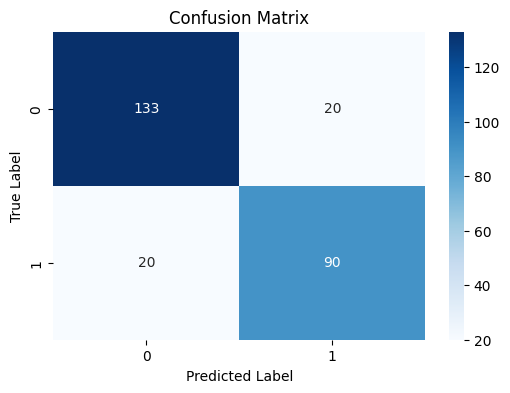

Waktu pelatihan: 15.8240 detik
Penggunaan memori: 3.5858 MB (saat ini), 3.6565 MB (puncak)


In [8]:
#5. Histogram Gradient Boosting

from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, f1_score, precision_score, classification_report

# Mulai tracking waktu dan memori
start_time = time.time()
tracemalloc.start()

#Parameters for HGB: {'max_iter': 1000, 'learning_rate': 0.1, 'min_samples_leaf': 5, 'max_depth': 5}


hgb_model = HistGradientBoostingClassifier(
    max_iter=1000,
    learning_rate=0.1,
    min_samples_leaf=5,
    max_depth=5)
   

hgb_model.fit(X_train_base, y_train_base)
predictions_rf = hgb_model.predict(X_holdout)

#metrics calculation
roc_auc = roc_auc_score(y_holdout, predictions_rf)
print('Validation roc auc score: ', roc_auc)

accuracy = accuracy_score(y_holdout, predictions_rf)
print('validation accuracy : ', accuracy)

recall = recall_score(y_holdout, predictions_rf)
print('validation recall : ', recall)

f1score = f1_score(y_holdout, predictions_rf)
print('validation f1-score : ', f1score)

precision  = precision_score(y_holdout, predictions_rf)
print('validation precision : ', precision)

#Confussion Metrics of Random Forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_holdout, predictions_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Akhiri tracking memori dan waktu
current, peak = tracemalloc.get_traced_memory()
end_time = time.time()

# Output
print(f"Waktu pelatihan: {end_time - start_time:.4f} detik")
print(f"Penggunaan memori: {current / 10**6:.4f} MB (saat ini), {peak / 10**6:.4f} MB (puncak)")

# Stop tracing
tracemalloc.stop()

Validation roc auc score:  0.8626262626262625
validation accuracy :  0.8669201520912547
validation recall :  0.8363636363636363
validation f1-score :  0.8401826484018264
validation precision :  0.8440366972477065


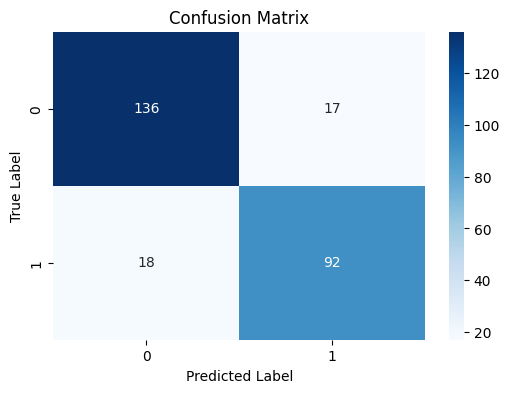

Waktu pelatihan: 4.6064 detik
Penggunaan memori: 1.3112 MB (saat ini), 1.3824 MB (puncak)


In [9]:
#6. XGBoost 

from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, f1_score, precision_score, classification_report

# Mulai tracking waktu dan memori
start_time = time.time()
tracemalloc.start()

#Best Parameters for xgb: {'n_estimators': 50, 'learning_rate': 0.3, 'max_depth': 6}

xgb_model = XGBClassifier(
    n_estimators=50, 
    max_depth=6,
    learning_rate=0.3)
   

xgb_model.fit(X_train_base, y_train_base)
predictions_rf = xgb_model.predict(X_holdout)

#metrics calculation
roc_auc = roc_auc_score(y_holdout, predictions_rf)
print('Validation roc auc score: ', roc_auc)

accuracy = accuracy_score(y_holdout, predictions_rf)
print('validation accuracy : ', accuracy)

recall = recall_score(y_holdout, predictions_rf)
print('validation recall : ', recall)

f1score = f1_score(y_holdout, predictions_rf)
print('validation f1-score : ', f1score)

precision  = precision_score(y_holdout, predictions_rf)
print('validation precision : ', precision)

#Confussion Metrics of Random Forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_holdout, predictions_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Akhiri tracking memori dan waktu
current, peak = tracemalloc.get_traced_memory()
end_time = time.time()

# Output
print(f"Waktu pelatihan: {end_time - start_time:.4f} detik")
print(f"Penggunaan memori: {current / 10**6:.4f} MB (saat ini), {peak / 10**6:.4f} MB (puncak)")

# Stop tracing
tracemalloc.stop()

0:	learn: 0.6867340	total: 176ms	remaining: 2m 55s
1:	learn: 0.6802541	total: 229ms	remaining: 1m 54s
2:	learn: 0.6740743	total: 245ms	remaining: 1m 21s
3:	learn: 0.6672344	total: 266ms	remaining: 1m 6s
4:	learn: 0.6609615	total: 285ms	remaining: 56.6s
5:	learn: 0.6555945	total: 300ms	remaining: 49.8s
6:	learn: 0.6514657	total: 317ms	remaining: 45s
7:	learn: 0.6463609	total: 330ms	remaining: 41s
8:	learn: 0.6406278	total: 344ms	remaining: 37.8s
9:	learn: 0.6341180	total: 361ms	remaining: 35.7s
10:	learn: 0.6287278	total: 377ms	remaining: 33.9s
11:	learn: 0.6255702	total: 392ms	remaining: 32.3s
12:	learn: 0.6213546	total: 410ms	remaining: 31.1s
13:	learn: 0.6162712	total: 425ms	remaining: 29.9s
14:	learn: 0.6120339	total: 438ms	remaining: 28.8s
15:	learn: 0.6074886	total: 442ms	remaining: 27.2s
16:	learn: 0.6025201	total: 456ms	remaining: 26.3s
17:	learn: 0.5981965	total: 469ms	remaining: 25.6s
18:	learn: 0.5935076	total: 482ms	remaining: 24.9s
19:	learn: 0.5887230	total: 496ms	remainin

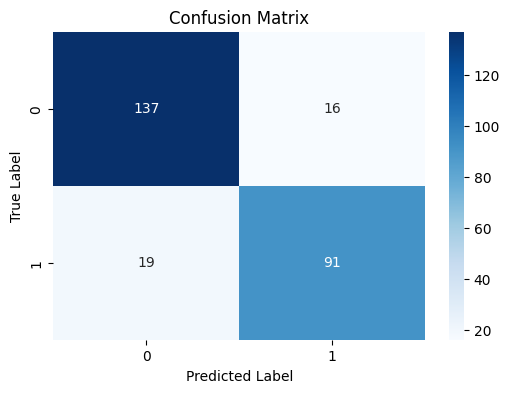

Waktu pelatihan: 51.5258 detik
Penggunaan memori: 1.1997 MB (saat ini), 1.2722 MB (puncak)


In [10]:
#7. Categorical Boosting (CatBoost)

from catboost import CatBoostClassifier, Pool
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, f1_score, precision_score, classification_report

# Mulai tracking waktu dan memori
start_time = time.time()
tracemalloc.start()
# Best Parameters for xgb: {'n_estimators': 1000, 'learning_rate': 0.01, 'depth': 10, 'min_data_in_leaf': 10}
# random_seed=1,
# logging_level='Silent'
# loss_function='Logloss'

cb_model = CatBoostClassifier(
    n_estimators=1000,
    learning_rate=0.01,
    depth=10,
    min_data_in_leaf=10,
    )
   
cb_model.fit(X_train_base, y_train_base)
predictions_rf = cb_model.predict(X_holdout)

#metrics calculation
roc_auc = roc_auc_score(y_holdout, predictions_rf)
print('Validation roc auc score: ', roc_auc)

accuracy = accuracy_score(y_holdout, predictions_rf)
print('validation accuracy : ', accuracy)

recall = recall_score(y_holdout, predictions_rf)
print('validation recall : ', recall)

f1score = f1_score(y_holdout, predictions_rf)
print('validation f1-score : ', f1score)

precision  = precision_score(y_holdout, predictions_rf)
print('validation precision : ', precision)

#Confussion Metrics of Random Forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_holdout, predictions_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Akhiri tracking memori dan waktu
current, peak = tracemalloc.get_traced_memory()
end_time = time.time()

# Output
print(f"Waktu pelatihan: {end_time - start_time:.4f} detik")
print(f"Penggunaan memori: {current / 10**6:.4f} MB (saat ini), {peak / 10**6:.4f} MB (puncak)")

# Stop tracing
tracemalloc.stop()

Validation roc auc score:  0.8815210932857992
validation accuracy :  0.8859315589353612
validation recall :  0.8545454545454545
validation f1-score :  0.8623853211009175
validation precision :  0.8703703703703703


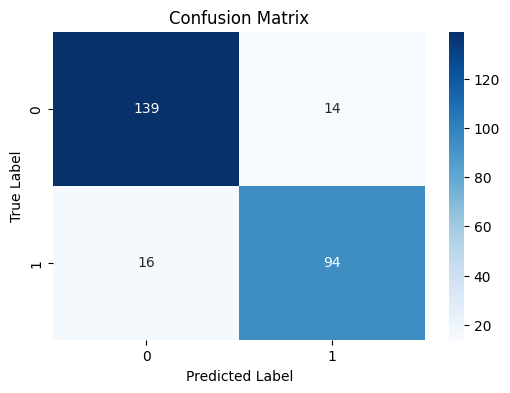

Waktu pelatihan: 284.8776 detik
Penggunaan memori: 31.9546 MB (saat ini), 88.7198 MB (puncak)


In [12]:
#create stacking ensemble
import pickle
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Mulai tracking waktu dan memori
start_time = time.time()
tracemalloc.start()

estimators_base_model = [
    ('randomforest', rf_model),
    ('extratrees', et_model),
    ('adaboost', adaboost_model),
    ('gradboost', gb_model),
    ('hgboost', hgb_model),
    ('xgboost', xgb_model),
    ('catboost', cb_model), 
]

#stacked model with  base model and logistic
stack_model = StackingClassifier(
    estimators=estimators_base_model, 
    final_estimator=RandomForestClassifier(), 
    passthrough=False,
    n_jobs=-1)

#train the model
stack_model.fit(X_train, y_train)

# Simpan model ke file
with open("model_stack3.pkl", "wb") as f:
    pickle.dump(stack_model, f)

#get prediction from stack
stack_predictors = stack_model.predict(X_holdout)

#evaluate model
#metrics calculation
roc_auc = roc_auc_score(y_holdout, stack_predictors)
print('Validation roc auc score: ', roc_auc)

accuracy = accuracy_score(y_holdout, stack_predictors)
print('validation accuracy : ', accuracy)

recall = recall_score(y_holdout, stack_predictors)
print('validation recall : ', recall)

f1score = f1_score(y_holdout, stack_predictors)
print('validation f1-score : ', f1score)

precision  = precision_score(y_holdout, stack_predictors)
print('validation precision : ', precision)

#Confussion Metrics of Random Forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_holdout, stack_predictors)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Akhiri tracking memori dan waktu
current, peak = tracemalloc.get_traced_memory()
end_time = time.time()

# Output
print(f"Waktu pelatihan: {end_time - start_time:.4f} detik")
print(f"Penggunaan memori: {current / 10**6:.4f} MB (saat ini), {peak / 10**6:.4f} MB (puncak)")

# Stop tracing
tracemalloc.stop()
